In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [4]:
# Ignoring the warnings
warnings.filterwarnings("ignore")
# Preprocessing the data by removing the categorical column and filling the null values
# Reading dataset CC.csv
dataset = pd.read_csv('CC GENERAL.csv')
# Replacing null values with mean
# print(dataset.isnull().any())
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(), inplace=True)
dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean(), inplace=True)
# print(dataset.isnull().any())
x = dataset.iloc[:, 1:18]

In [5]:
# Apply StandardScaler() and normalize() functions to scale and normalize raw input data
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)
# print("After scaling", X_Scale)
normalized_arr = normalize(X_Scale)
# print("After normalizing", normalized_arr)
# Using PCA with K=2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataset[['TENURE']]], axis=1)
print('CC dataset finalDf after scaling and normalizing:')
print(finalDf)

CC dataset finalDf after scaling and normalizing:
      principal component 1  principal component 2  TENURE
0              -4326.383956             921.566884      12
1               4118.916676           -2432.846347      12
2               1497.907660           -1997.578692      12
3               1394.548556           -1488.743450      12
4              -3743.351874             757.342659      12
...                     ...                    ...     ...
8945           -4208.357938            1122.443274       6
8946           -4123.924001             951.683803       6
8947           -4379.444202             911.504566       6
8948           -4791.117744            1032.540944       6
8949           -3623.702749            1555.134769       6

[8950 rows x 3 columns]


Text(0.5, 1.0, 'Agglomerative Clustering Scatter plot for k = 5')

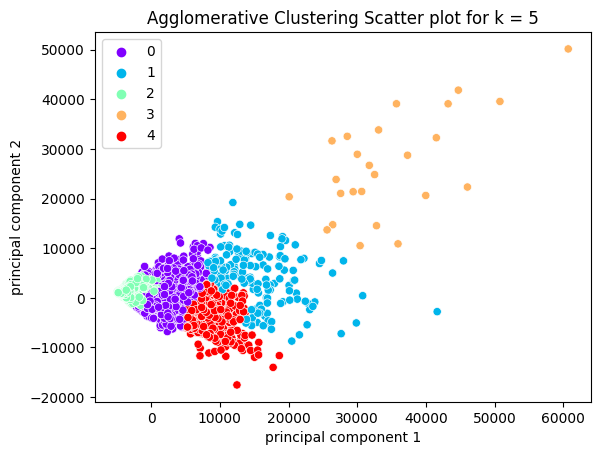

In [6]:
# Applying Agglomerative Clustering with k = 2,3,4 and 5 on reduced features and 
# visualize result for each k value using scatter plot
# Agglomerative Clustering and scatter plot with k = 5
clustering_model_pca = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(finalDf)
data_labels_pca = clustering_model_pca.labels_
sns.scatterplot(x=finalDf['principal component 1'],
                y=finalDf['principal component 2'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Agglomerative Clustering Scatter plot for k = 5')

Text(0.5, 1.0, 'Agglomerative Clustering Scatter plot for k = 4')

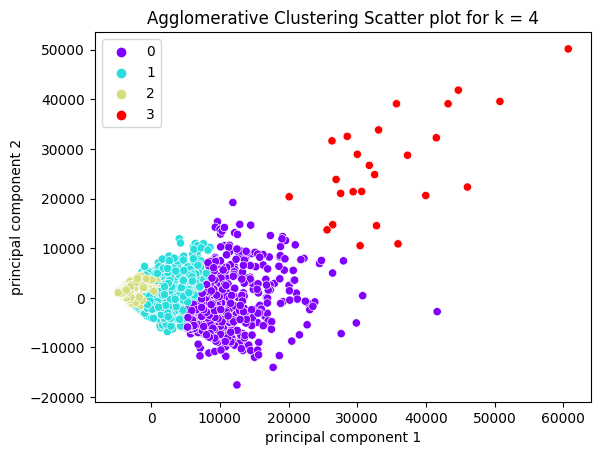

In [7]:
# Agglomerative Clustering and scatter plot with k = 4
clustering_model_pca = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(finalDf)
data_labels_pca = clustering_model_pca.labels_
sns.scatterplot(x=finalDf['principal component 1'],
                y=finalDf['principal component 2'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Agglomerative Clustering Scatter plot for k = 4')

Text(0.5, 1.0, 'Agglomerative Clustering Scatter plot for k = 3')

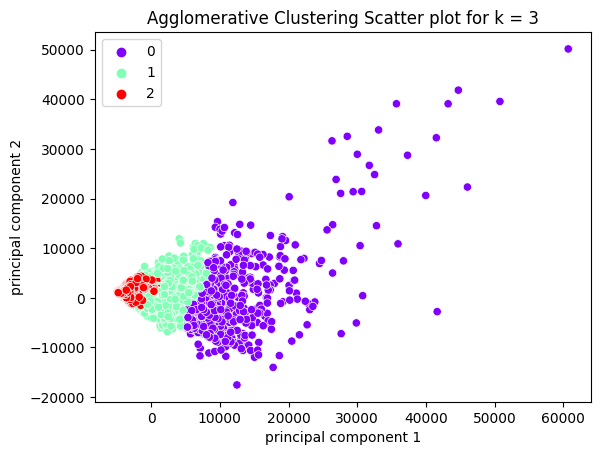

In [8]:
# Agglomerative Clustering and scatter plot with k = 3
clustering_model_pca = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(finalDf)
data_labels_pca = clustering_model_pca.labels_
sns.scatterplot(x=finalDf['principal component 1'],
                y=finalDf['principal component 2'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Agglomerative Clustering Scatter plot for k = 3')

Text(0.5, 1.0, 'Agglomerative Clustering Scatter plot for k = 2')

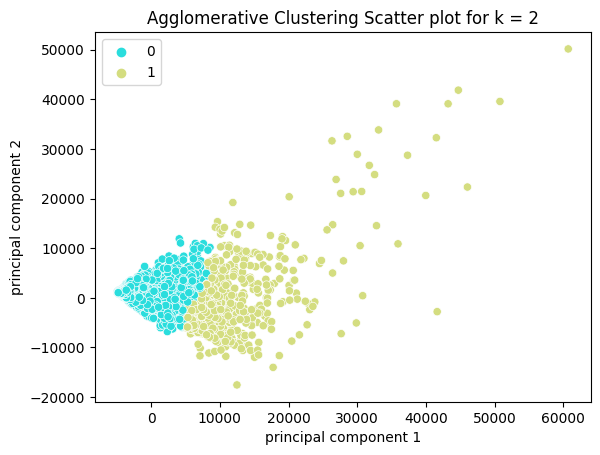

In [9]:
# Agglomerative Clustering and scatter plot with k = 2
clustering_model_pca = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(finalDf)
data_labels_pca = clustering_model_pca.labels_
sns.scatterplot(x=finalDf['principal component 1'],
                y=finalDf['principal component 2'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Agglomerative Clustering Scatter plot for k = 2')

In [10]:
# Evaluating different variations using Silhouette Scores
# Silhouette Scores for 2 clusters
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)
score2 = metrics.silhouette_score(x, y_cluster_kmeans)
print('Silhouette Score for 2 clusters =', score2)
# Silhouette Scores for 3 clusters
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)
score3 = metrics.silhouette_score(x, y_cluster_kmeans)
print('Silhouette Score for 3 clusters =', score3)
# Silhouette Scores for 4 clusters
nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)
score4 = metrics.silhouette_score(x, y_cluster_kmeans)
print('Silhouette Score for 4 clusters =', score4)
# Silhouette Scores for 5 clusters
nclusters = 5
km = KMeans(n_clusters=nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)
score5 = metrics.silhouette_score(x, y_cluster_kmeans)
print('Silhouette Score for 5 clusters =', score5)

Silhouette Score for 2 clusters = 0.5114773214237212
Silhouette Score for 3 clusters = 0.4676551448676235
Silhouette Score for 4 clusters = 0.46655763491298624
Silhouette Score for 5 clusters = 0.3964843861130676


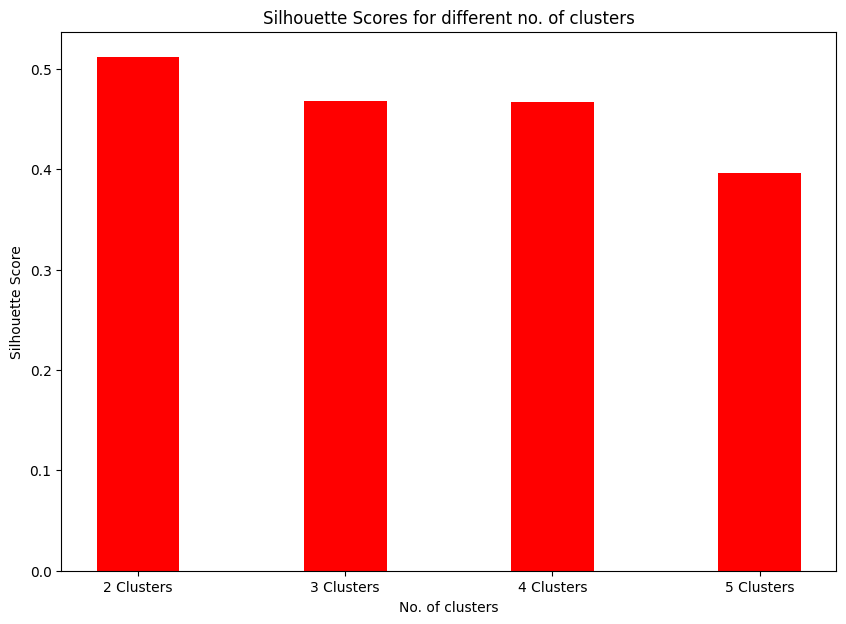

In [11]:
# Visualizing different Silhouette Scores with a bar chart
silhouetteScores = [score2, score3, score4, score5]
clusters = ['2 Clusters', '3 Clusters', '4 Clusters', '5 Clusters']
fig = plt.figure(figsize=(10, 7))
plt.bar(clusters, silhouetteScores, color='red', width=0.4)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different no. of clusters")
plt.show()